In [1]:
#Plotting Spectrograms
import math, random
import torch
import torchaudio
from torchaudio import transforms
from IPython.display import Audio
import numpy as np
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import librosa
import librosa.display

/home2/krsd48/anaconda3/lib/python3.9/site-packages/librosa/util/decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=560
  return f(*args, **kwargs)


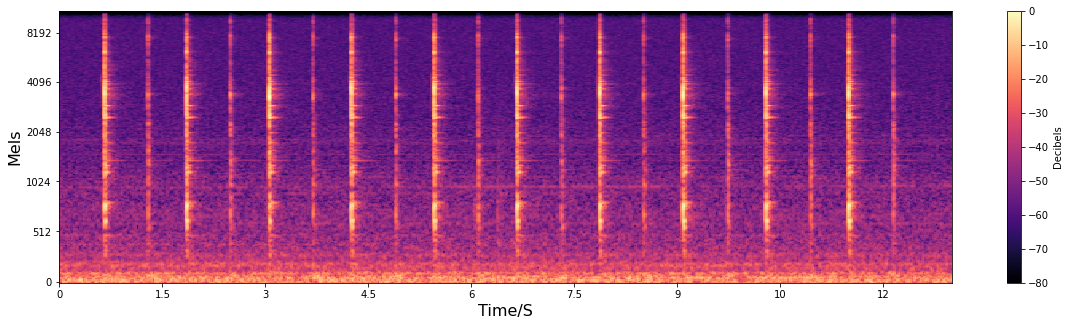

In [24]:
audio_file= 'Galvanised_90.wav'
def view_specrogram(aud,n_fft=2048, samplerate = 22050, hop_len=None):
    samples, sample_rate=librosa.load(aud, sr = samplerate)
    S = librosa.feature.melspectrogram(y=samples, sr=sample_rate, n_mels=300)
    audio_stft = librosa.core.stft(S, hop_length=hop_len, n_fft=n_fft)# gathering the absolute values for all values in our audio_stft 
    S_dB = librosa.power_to_db(S, ref=np.max)# Converting the amplitude to decibel
    librosa.feature.melspectrogram(S=S_dB,sr=sample_rate, fmax=4000)
    #librosa.feature.spectral_bandwidth(*, y=None, sr=44100, S=None, n_fft=2048, hop_length=None, win_length=None, window='hann', center=True, pad_mode='constant', freq=None, centroid=None, norm=True, p=2)
    plt.figure(figsize=(20, 5))# Using librosa.display.specshow() to create our spectrogram
    librosa.display.specshow(S_dB, sr=sample_rate, x_axis='time', y_axis='mel', cmap='magma')
    plt.colorbar(label='Decibels')
    plt.xlabel('Time/S', fontdict=dict(size=16))
    plt.ylabel('Mels', fontdict=dict(size=16))
    plt.show()
view_specrogram(audio_file)

[Text(0.5, 1.0, 'Mel-frequency spectrogram')]

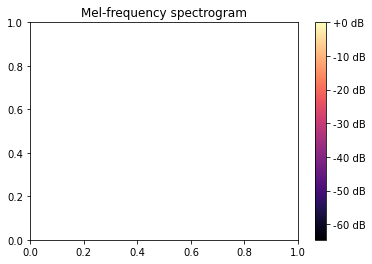

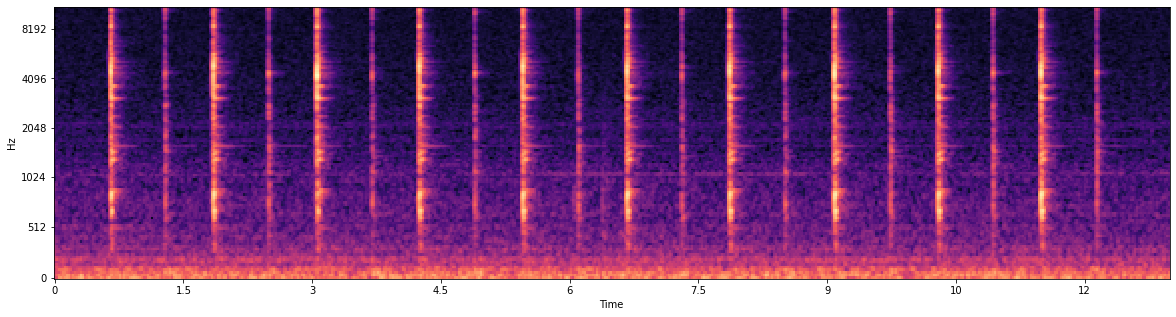

In [22]:
audio_file= 'Galvanised_90.wav'
samples, sample_rate=librosa.load(audio_file, sr = 22050)
S = librosa.feature.melspectrogram(y=samples, sr=sample_rate, n_mels=128, fmax=8000)
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
S_dB = librosa.power_to_db(S, ref=np.max)
plt.figure(figsize=(20, 5))
img = librosa.display.specshow(S_dB, sr=sample_rate, x_axis='time', y_axis='mel', cmap='magma')
fig.colorbar(img, ax=ax, format='%+2.0f dB')

ax.set(title='Mel-frequency spectrogram')